# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Achmad Warsito Sujatmiko
- **Email:** titojatmiko91@gmail.com
- **ID Dicoding:** itsmxj29

## Menentukan Pertanyaan Bisnis

- Pada Bulan apa peminjaman sepeda tertinggi dan terendah dari bulan ke bulan pada tahun 2011
- Apakah peminjaman sepeda lebih tinggi pada hari dengan kondisi cuaca cerah , mendung , hujan , dan hujan lebat pada tahun 2011
- Berapa rata rata peminjaman sepeda tiap musim (musim semi , musim panas , musim gugur , dan musim salju pada tahun 2011

## Import Semua Packages/Library yang Digunakan

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [33]:
# Corrected URL to raw CSV file
daily_data = pd.read_csv("https://raw.githubusercontent.com/Achmaddd29/Analisis-Data/main/dataset/day.csv")

# Display the first few rows of the dataset to understand the structure
daily_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [34]:
# Load the datasets
hourly_data = pd.read_csv("https://raw.githubusercontent.com/Achmaddd29/Analisis-Data/main/dataset/hour.csv")

# Display the first few rows of each dataset to understand the structure
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Dataset ini memiliki beberapa kolom penting:**

- instant: Index harian atau jam.
- dteday: Tanggal peminjaman.
- season: Musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
- yr: Tahun (0: 2011, 1: 2012).
- mnth: Bulan.
- hr: Jam (hanya pada data per jam).
- holiday: Apakah hari libur (0: tidak, 1: ya).
- weekday: Hari dalam seminggu.
- workingday: Apakah hari kerja (0: tidak, 1: ya).
- weathersit: Kondisi cuaca (1: cerah, 2: mendung, 3: hujan, 4: hujan lebat).
- cnt: Jumlah peminjaman sepeda total.

### Assessing Data

In [35]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [36]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [37]:
print("Jumlah entri untuk setiap kolom dalam data day:")
daily_data.nunique()

Jumlah entri untuk setiap kolom dalam data day:


instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [38]:
print("Jumlah entri untuk setiap kolom dalam data hour:")
hourly_data.nunique()

Jumlah entri untuk setiap kolom dalam data hour:


instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [39]:
daily_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [40]:
hourly_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [41]:
daily_data.duplicated().sum()

np.int64(0)

In [42]:
hourly_data.duplicated().sum()

np.int64(0)

**Insight:**
- Struktur Data: Melalui info(), kita mendapatkan gambaran umum tentang tipe dan kelengkapan data.
- Keunikan Data: Fungsi nunique() memberikan wawasan apakah kolom memiliki banyak variasi atau banyak nilai yang duplikat.
- Kebersihan Data: isna().sum() menunjukkan adanya missing values yang perlu ditangani, sementara duplicated().sum() membantu mengidentifikasi duplikasi dalam data yang bisa mengganggu analisis lebih lanjut.

### Cleaning Data

In [43]:
daily_data['dteday'] = pd.to_datetime(daily_data['dteday'])

In [44]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [45]:
hourly_data['dteday'] = pd.to_datetime(hourly_data['dteday'])

In [46]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [47]:
print("Deskripsi Statistik:")
print(daily_data.describe())

Deskripsi Statistik:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    

In [48]:
print("Deskripsi Statistik:")
print(hourly_data.describe())

Deskripsi Statistik:
          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000  

**Insight :**
- Dengan mengonversi kolom dteday menjadi format datetime, kita bisa lebih mudah melakukan analisis terkait waktu (misalnya, menghitung perbedaan waktu, mengambil data berdasarkan tanggal, atau mengelompokkan data berdasarkan waktu).
- Fungsi .info() memberikan gambaran tentang struktur data, apakah ada nilai yang hilang, dan tipe data setiap kolom.
- Deskripsi statistik memberikan informasi ringkas mengenai distribusi data numerik di dalam kedua dataframe, membantu kita memahami rentang nilai, kecenderungan, dan variasi data yang ada.

## Exploratory Data Analysis (EDA)

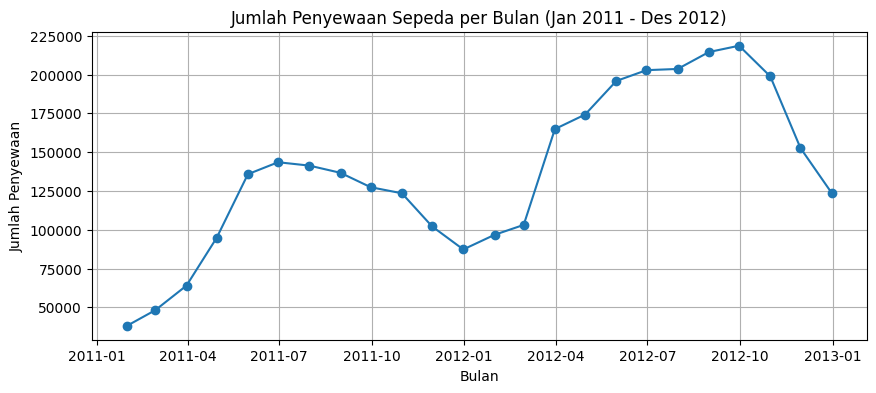

In [49]:
bulanan = daily_data.groupby(pd.Grouper(key='dteday', freq='ME')).sum()

plt.figure(figsize=(10, 4))
plt.plot(bulanan.index, bulanan['cnt'], marker='o', linestyle='-')
plt.title('Jumlah Penyewaan Sepeda per Bulan (Jan 2011 - Des 2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

**insight:**

- Grafik yang dihasilkan akan menunjukkan tren jumlah penyewaan sepeda per bulan antara Januari 2011 hingga Desember 2012.
- Dengan plot ini, kita dapat melihat pola musiman atau perubahan jumlah penyewaan sepeda dari bulan ke bulan, yang dapat memberikan wawasan tentang perubahan tren (misalnya, lebih banyak penyewaan di musim panas atau liburan).

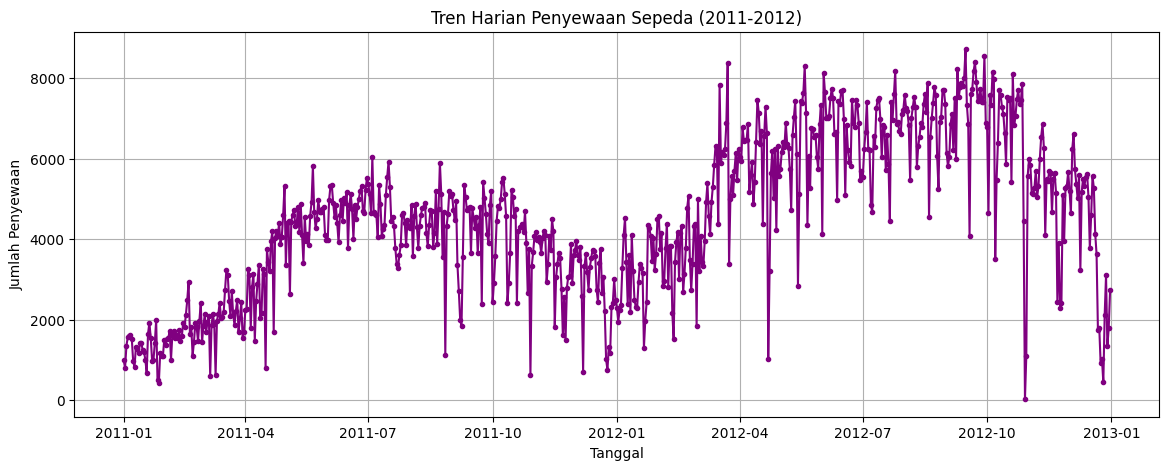

In [50]:
plt.figure(figsize=(14, 5))
plt.plot(daily_data['dteday'], daily_data['cnt'], color='purple', linestyle='-', marker='.')
plt.title("Tren Harian Penyewaan Sepeda (2011-2012)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.grid(True)
plt.show()

**Insight :**
- Tren Musiman: Menunjukkan apakah ada kenaikan atau penurunan musiman dalam penyewaan sepeda, misalnya saat musim panas.
- Fluktuasi Harian: Menunjukkan pola penyewaan berdasarkan hari tertentu, seperti peningkatan di akhir pekan atau liburan.
- Kenaikan atau Penurunan Jangka Panjang: Memperlihatkan apakah penyewaan sepeda meningkat atau menurun secara keseluruhan selama periode tersebut.
- Anomali: Membantu mendeteksi lonjakan atau penurunan yang tidak biasa.

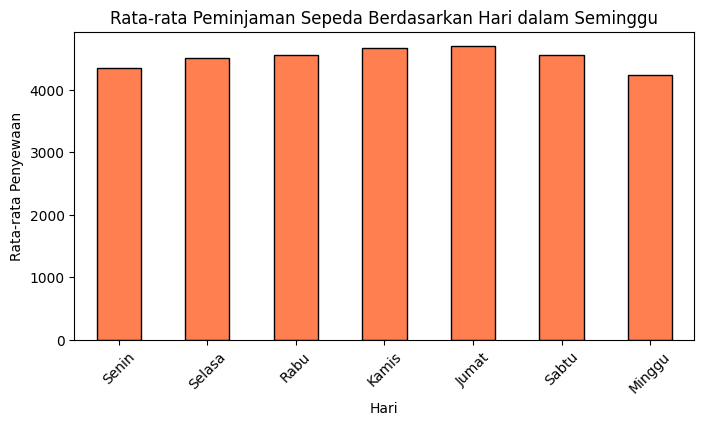

In [51]:
daily_data['weekday'] = pd.to_datetime(daily_data['dteday']).dt.dayofweek
weekday_avg = daily_data.groupby('weekday')['cnt'].mean()
weekday_names = {0: "Senin", 1: "Selasa", 2: "Rabu", 3: "Kamis", 4: "Jumat", 5: "Sabtu", 6: "Minggu"}
weekday_avg.index = weekday_avg.index.map(weekday_names)

plt.figure(figsize=(8, 4))
weekday_avg.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(rotation=45)
plt.show()

**Insight :**
- Dari visualisasi ini, kita dapat melihat tren peminjaman sepeda berdasarkan hari dalam seminggu. Misalnya, apakah ada hari tertentu yang lebih banyak peminjamannya atau hari yang lebih rendah. Insight ini bisa digunakan untuk optimasi penggunaan sepeda di hari-hari tertentu dan pengelolaan armada sepeda secara lebih efektif.

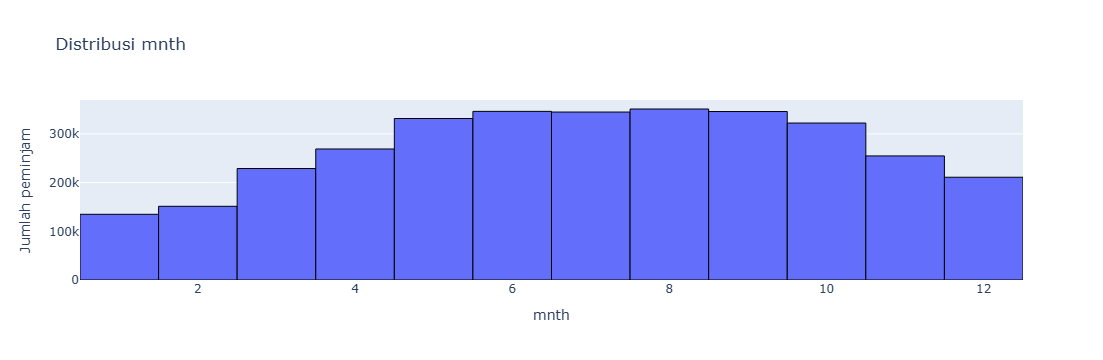

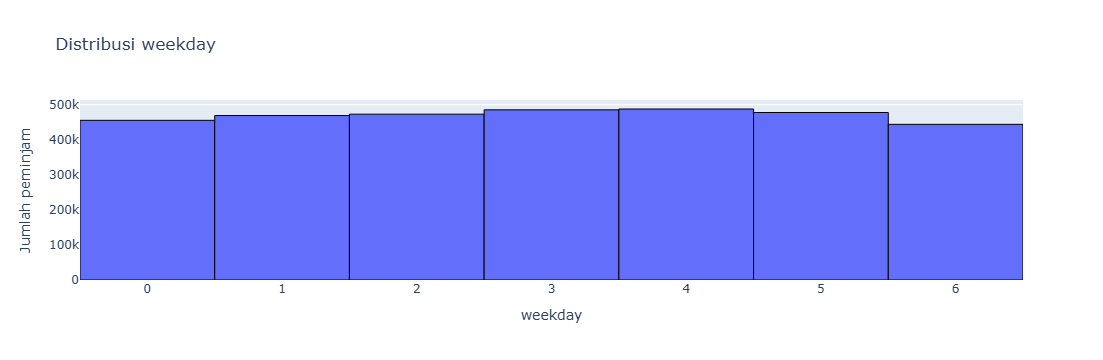

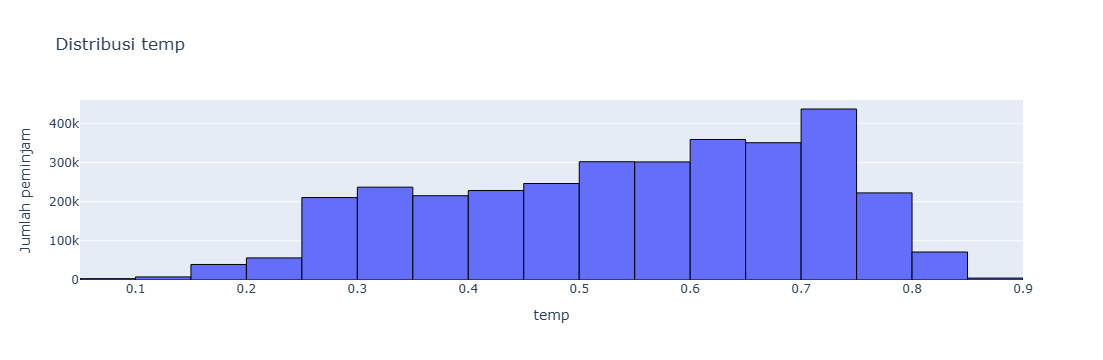

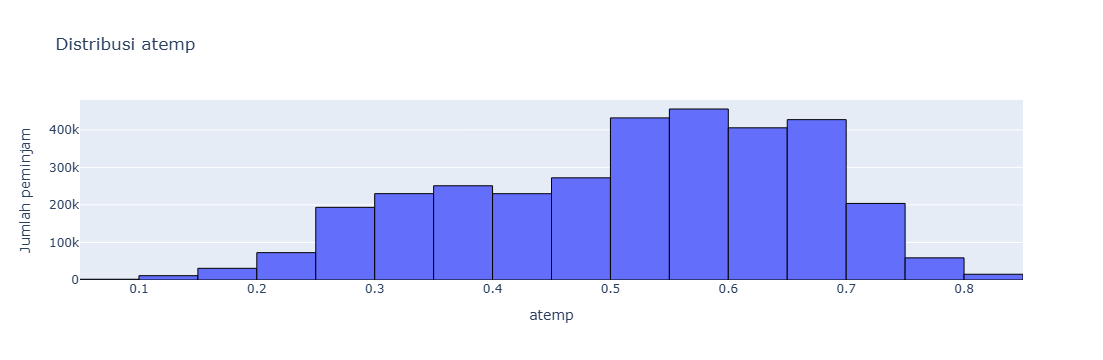

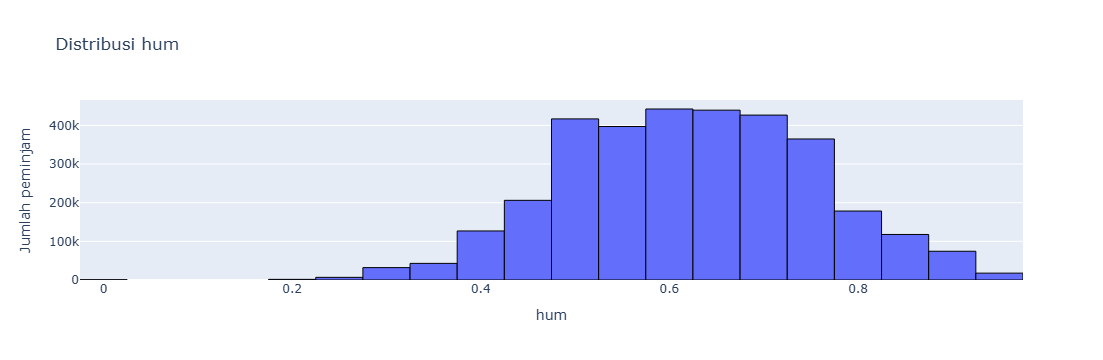

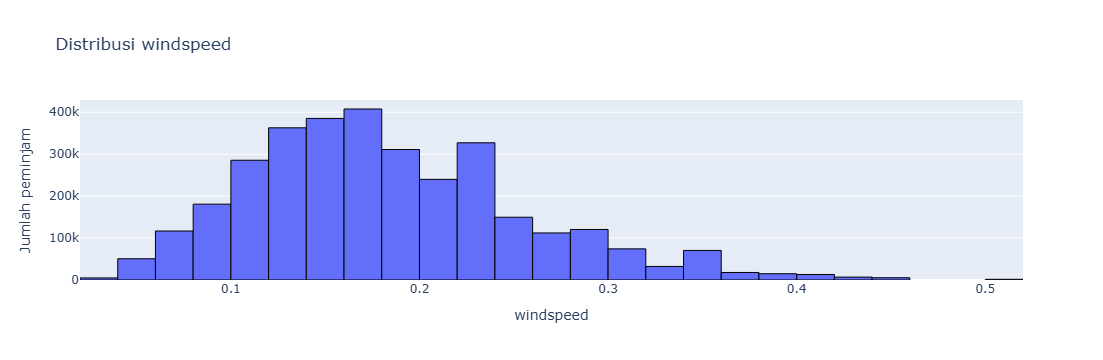

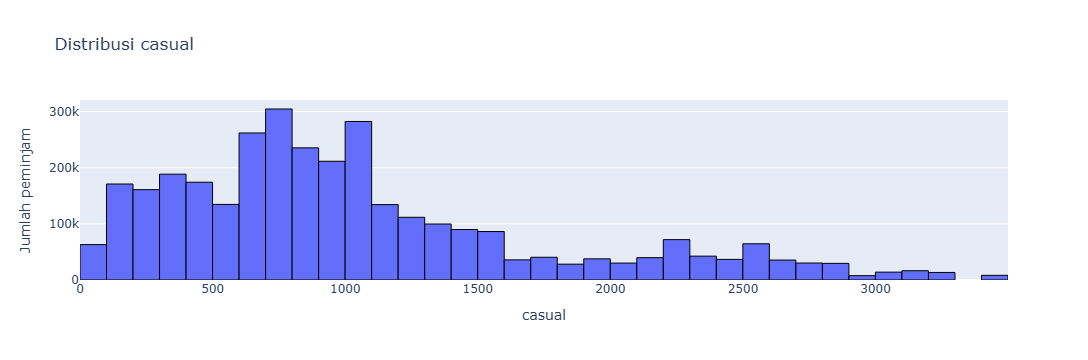

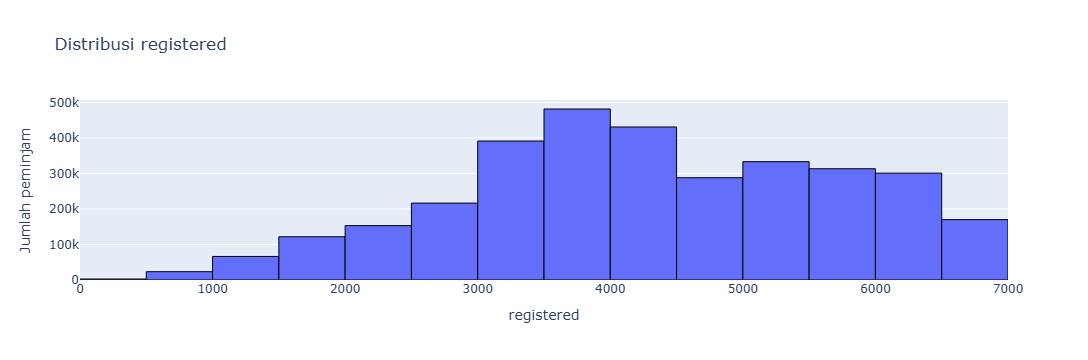

In [52]:
fitur = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
for feature in fitur:
    fig = px.histogram(daily_data, x=feature, y='cnt', title=f'Distribusi {feature}')
    fig.update_traces(marker_line_color='black', marker_line_width=1)
    fig.update_layout(yaxis_title='Jumlah peminjam')
    fig.show()

**Insight :**
- Seasonal Trends: Misalnya, dengan melihat distribusi berdasarkan bulan (mnth), Anda bisa mengetahui musim mana yang memiliki peminjam terbanyak.
- Behavioral Patterns: Dengan melihat hari dalam minggu (weekday), bisa diketahui apakah ada pola peminjaman yang lebih sering terjadi pada hari tertentu.
- Influence of Weather: Fitur seperti suhu (temp, atemp), kelembapan (hum), dan kecepatan angin (windspeed) dapat memberikan gambaran tentang bagaimana cuaca memengaruhi jumlah peminjam.
- Casual vs Registered Users: Anda bisa mengidentifikasi perbedaan pola antara peminjam casual dan registered berdasarkan fitur lainnya.

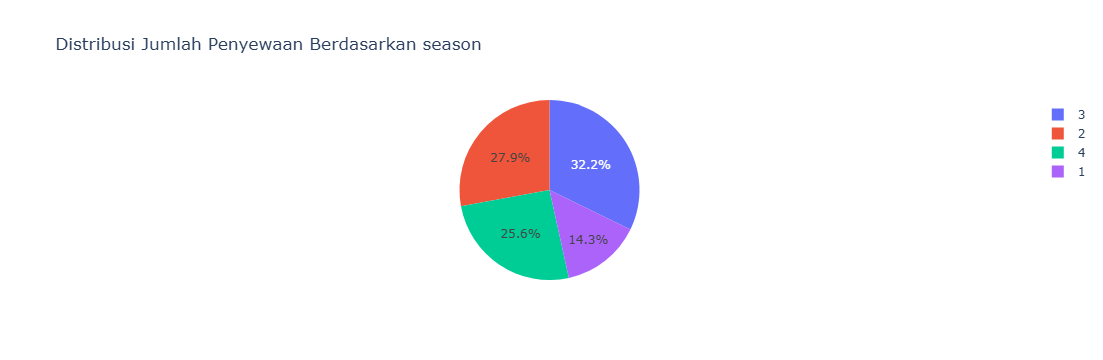

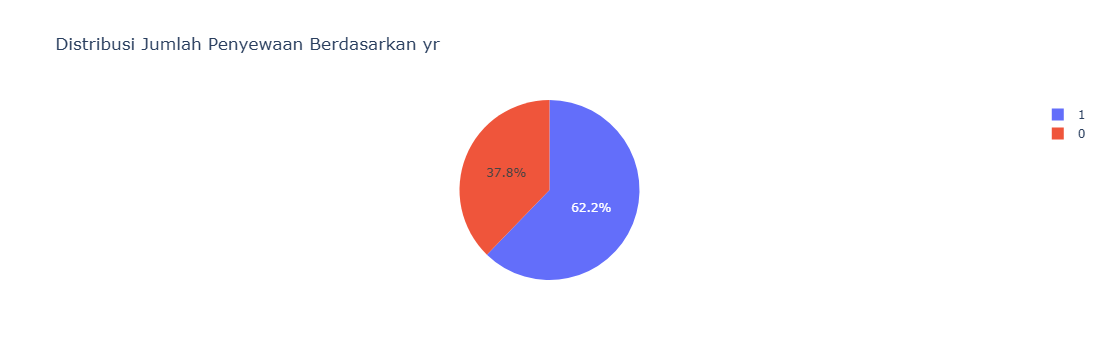

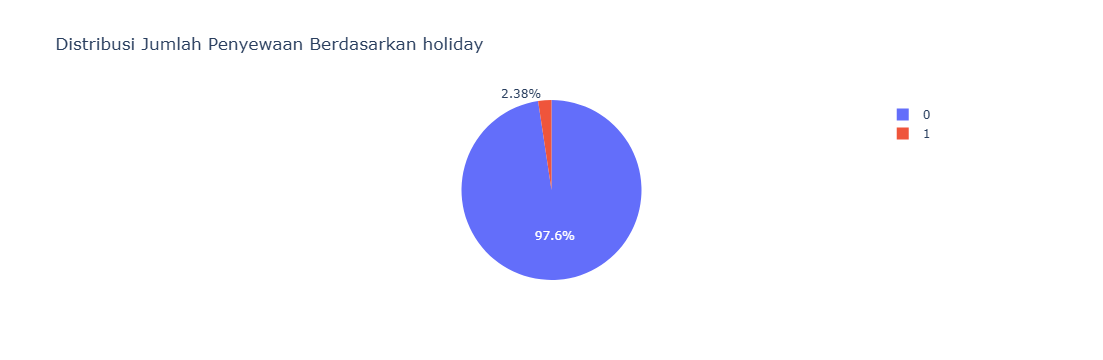

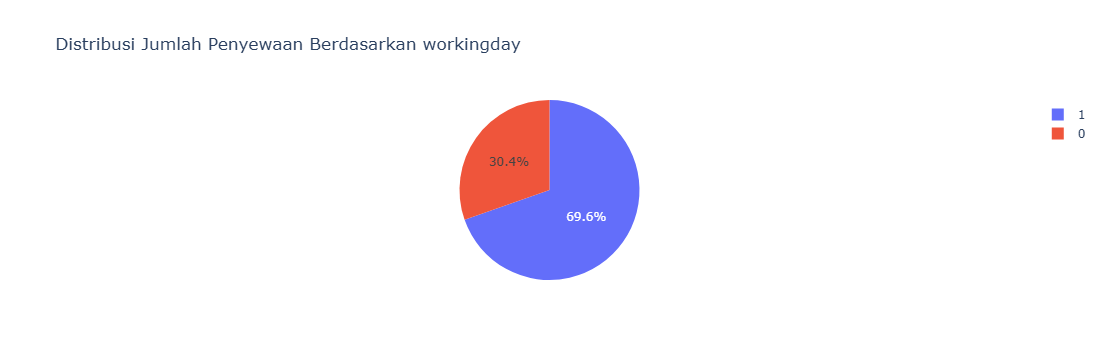

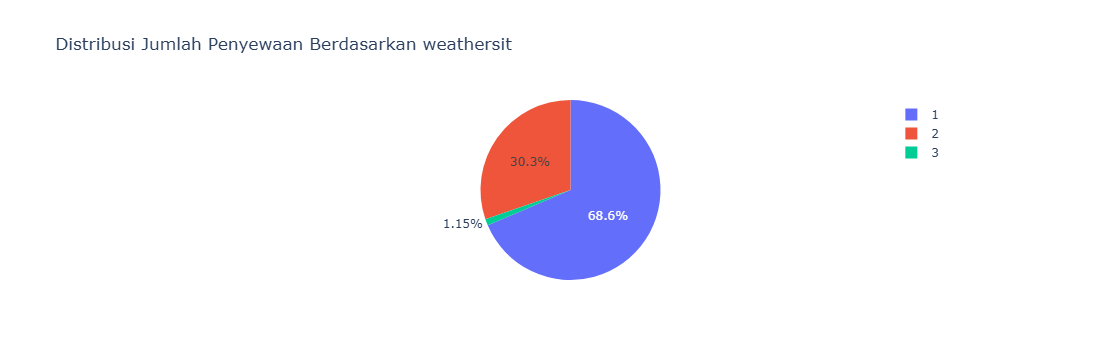

In [53]:
w = ['season', 'yr', 'holiday', 'workingday', 'weathersit']

for w in w:
    fig = px.pie(daily_data, names=w, values='cnt',
                 title=f'Distribusi Jumlah Penyewaan Berdasarkan {w}')
    fig.show()

**Insight :**
- Musim (season): Dapat terlihat bagaimana penyewaan bervariasi sepanjang tahun (misalnya lebih banyak di musim tertentu).
- Tahun (yr): Mungkin ada perbedaan signifikan antara tahun-tahun yang menunjukkan tren penyewaan (misalnya, tahun yang lebih baru memiliki jumlah penyewaan lebih banyak).
- Liburan (holiday): Distribusi penyewaan pada hari libur vs. non-libur.
- Hari kerja (workingday): Menunjukkan apakah penyewaan lebih banyak terjadi pada hari kerja dibandingkan dengan akhir pekan.
- Kondisi cuaca (weathersit): Membantu memahami pengaruh cuaca terhadap jumlah penyewaan.

In [54]:
# Add a 'year' column for filtering data by 2011
hourly_data['year'] = hourly_data['dteday'].dt.year
daily_data['year'] = daily_data['dteday'].dt.year

In [55]:
# Filter daily data to only include 2011
daily_data_2011 = daily_data[daily_data['year'] == 2011]

In [56]:
# Group by month and calculate total bike rentals to find highest and lowest months
monthly_counts_2011 = daily_data_2011.groupby('mnth')['cnt'].sum()

Tabel Korelasi Data Harian:
             instant    dteday    season        yr      mnth   holiday  \
instant     1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
dteday      1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
season      0.412224  0.412224  1.000000 -0.001844  0.831440 -0.010537   
yr          0.866025  0.866025 -0.001844  1.000000 -0.001792  0.007954   
mnth        0.496702  0.496702  0.831440 -0.001792  1.000000  0.019191   
holiday     0.016145  0.016145 -0.010537  0.007954  0.019191  1.000000   
weekday    -0.000016 -0.000016 -0.007993 -0.001368  0.003159 -0.188274   
workingday -0.004337 -0.004337  0.012485 -0.002013 -0.005901 -0.253023   
weathersit -0.021477 -0.021477  0.019211 -0.048727  0.043528 -0.034627   
temp        0.150580  0.150580  0.334315  0.047604  0.220205 -0.028556   
atemp       0.152638  0.152638  0.342876  0.046106  0.227459 -0.032507   
hum         0.016375  0.016375  0.205445 -0.110651  0.222204 -0.015937   
windspeed 

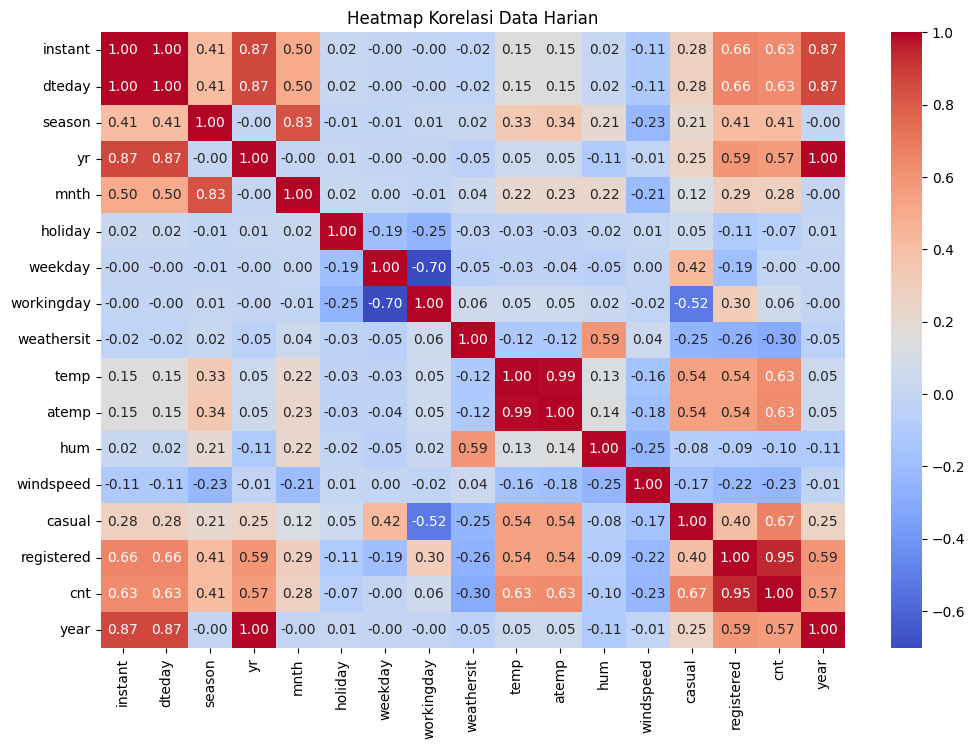

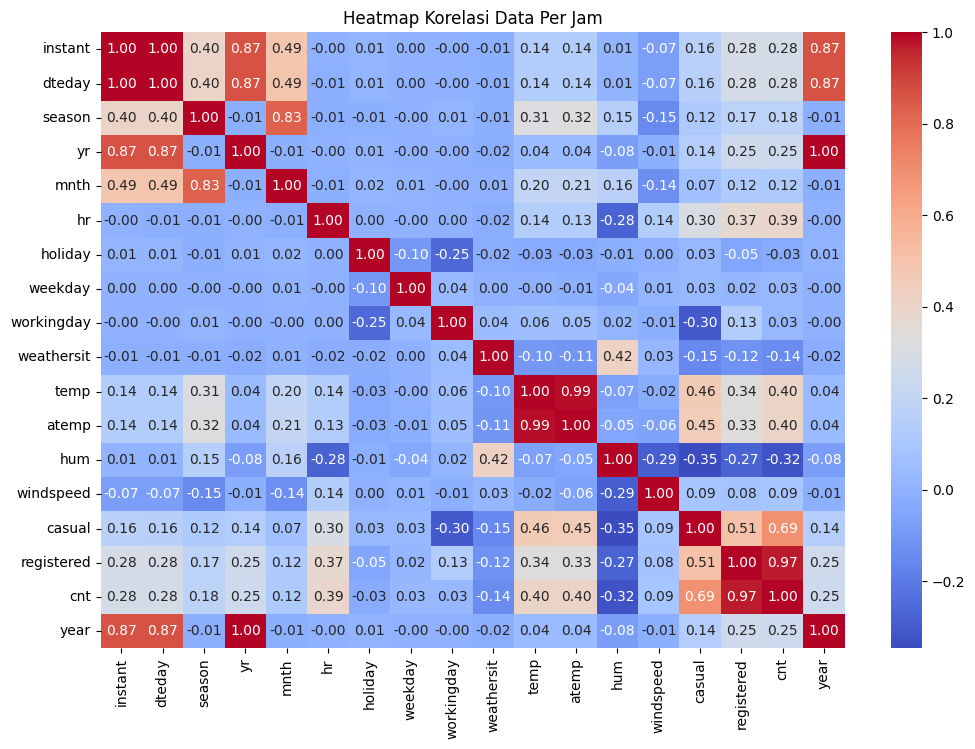

In [57]:
# 1. Menghitung matriks korelasi
day_corr = daily_data.corr()
hour_corr = hourly_data.corr()

# 2. Menampilkan matriks korelasi sebagai tabel
print("Tabel Korelasi Data Harian:")
print(day_corr)
print("\nTabel Korelasi Data Per Jam:")
print(hour_corr)

# 3. Visualisasi Korelasi
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Data Harian")
sns.heatmap(day_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Data Per Jam")
sns.heatmap(hour_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

**Insight :**
- Nilai Korelasi: Matriks korelasi memberikan wawasan tentang seberapa erat hubungan antara berbagai fitur. Nilai korelasi berkisar antara -1 (hubungan negatif sempurna) hingga 1 (hubungan positif sempurna).
- Misalnya, jika ada korelasi yang sangat tinggi (dekat dengan 1 atau -1) antara fitur seperti temperature dan cnt (jumlah penyewaan), itu menunjukkan bahwa perubahan suhu sangat memengaruhi jumlah penyewaan.
- Heatmap Visual: Heatmap memungkinkan kita untuk dengan mudah mengidentifikasi pola korelasi. Nilai korelasi yang kuat akan ditandai dengan warna yang lebih gelap (merah atau biru tergantung arah korelasinya), sedangkan korelasi lemah akan memiliki warna yang lebih terang.

## Visualization & Explanatory Analysis

In [58]:
# Daftar nama bulan dalam Bahasa Indonesia
bulan_indo = [
    "", "Januari", "Februari", "Maret", "April", "Mei", "Juni",
    "Juli", "Agustus", "September", "Oktober", "November", "Desember"
]

### Pertanyaan 1:

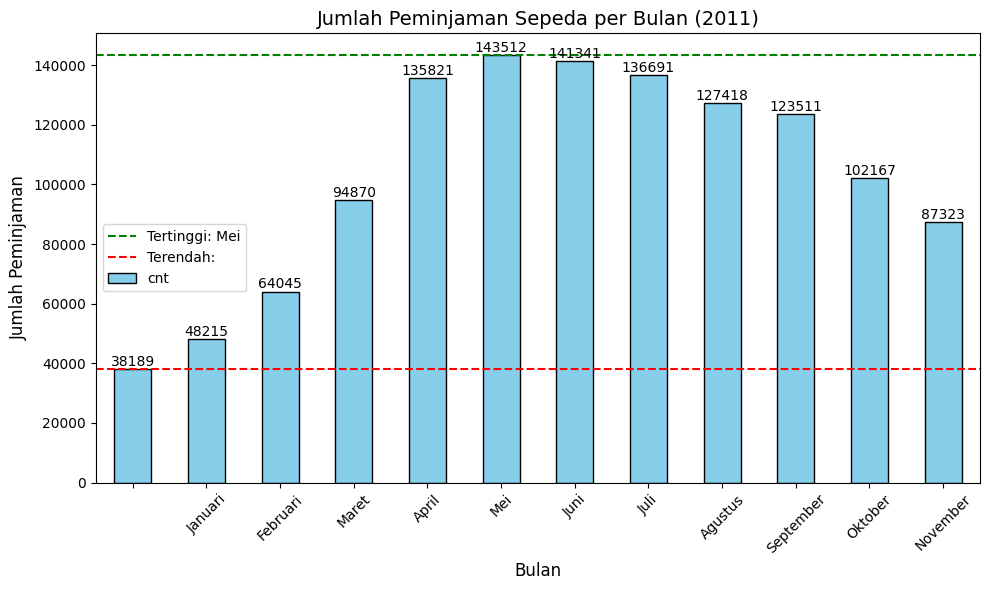

Bulan dengan Peminjaman Tertinggi adalah bulan Mei Dengan Total Peminjaman: 143512
Bulan dengan Peminjaman Terendah adalah bulan  Dengan Peminjaman: 38189


In [59]:
# Temukan bulan dengan peminjaman tertinggi dan terendah
highest_month = monthly_counts_2011.idxmax()
lowest_month = monthly_counts_2011.idxmin()
highest_rentals = monthly_counts_2011.max()
lowest_rentals = monthly_counts_2011.min()

# Mengubah angka bulan menjadi nama bulan dalam Bahasa Indonesia
highest_month_name = bulan_indo[highest_month - 1]  # Adjusted to index correctly
lowest_month_name = bulan_indo[lowest_month - 1]

# Monthly rentals bar chart
plt.figure(figsize=(10, 6))
monthly_counts_2011.index = monthly_counts_2011.index.map(lambda x: bulan_indo[x-1])
ax = monthly_counts_2011.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan anotasi pada bar chart
for i, value in enumerate(monthly_counts_2011):
    ax.text(i, value + 50, f'{value}', ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label sumbu
plt.title("Jumlah Peminjaman Sepeda per Bulan (2011)", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)

# Mengatur rotasi label bulan agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menambahkan garis horizontal untuk menandai bulan tertinggi dan terendah
plt.axhline(y=highest_rentals, color='green', linestyle='--', label=f'Tertinggi: {highest_month_name}')
plt.axhline(y=lowest_rentals, color='red', linestyle='--', label=f'Terendah: {lowest_month_name}')

# Menambahkan legenda untuk garis tertinggi dan terendah
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

# Cetak hasil dengan format yang rapi
print(f"Bulan dengan Peminjaman Tertinggi adalah bulan {highest_month_name} Dengan Total Peminjaman: {highest_rentals}")
print(f"Bulan dengan Peminjaman Terendah adalah bulan {lowest_month_name} Dengan Peminjaman: {lowest_rentals}")


### Pertanyaan 2:

In [60]:
# Group daily data by weather situation and calculate the average rentals
weather_rental_avg = daily_data_2011.groupby('weathersit')['cnt'].mean()

In [61]:
# Map weather conditions to descriptive names
weather_conditions = {
    1: "Cerah",
    2: "Mendung",
    3: "Hujan",
    4: "Hujan Lebat"
}

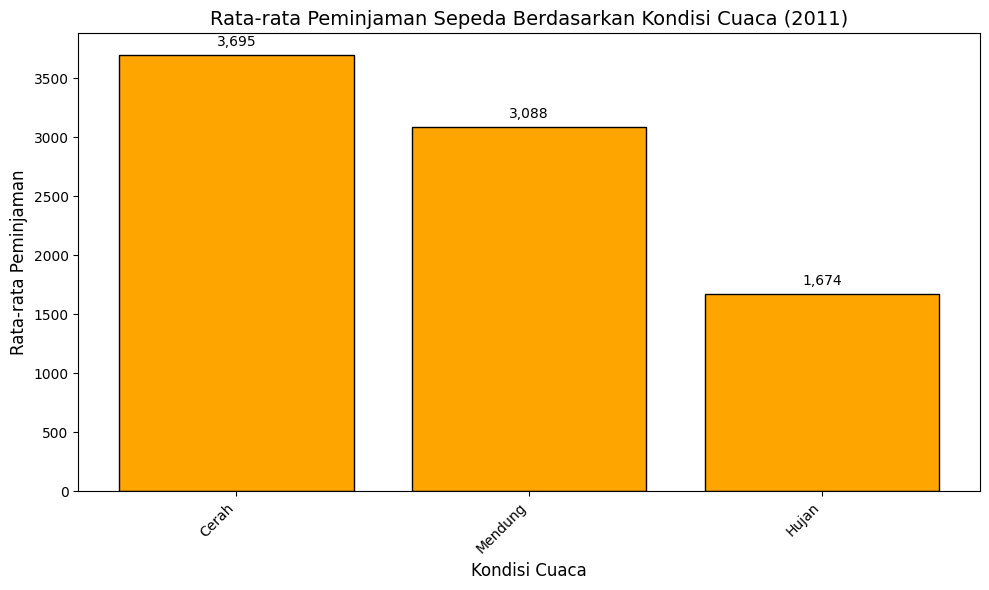

weathersit
Cerah      3,695
Mendung    3,088
Hujan      1,674
Name: cnt, dtype: object


In [62]:
# Map the weathersit to conditions
weather_rental_avg.index = weather_rental_avg.index.map(weather_conditions)

# Sort values in descending order
weather_rental_avg_sorted = weather_rental_avg.sort_values(ascending=False)

# Format the values as integers, round them, and display with thousands separator
weather_rental_avg_formatted = weather_rental_avg_sorted.apply(lambda x: f"{round(x):,}")

# Improved Weather condition rentals bar chart
plt.figure(figsize=(10, 6))

# Plot the bar chart
bars = plt.bar(weather_rental_avg_sorted.index, weather_rental_avg_sorted, color='orange', edgecolor='black')

# Add title and labels with more readable font sizes
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca (2011)", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Peminjaman", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add labels on top of the bars for better clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f"{round(yval):,}", ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Print the formatted result for weather rental averages
print(weather_rental_avg_formatted)

### Pertanyaan 3:

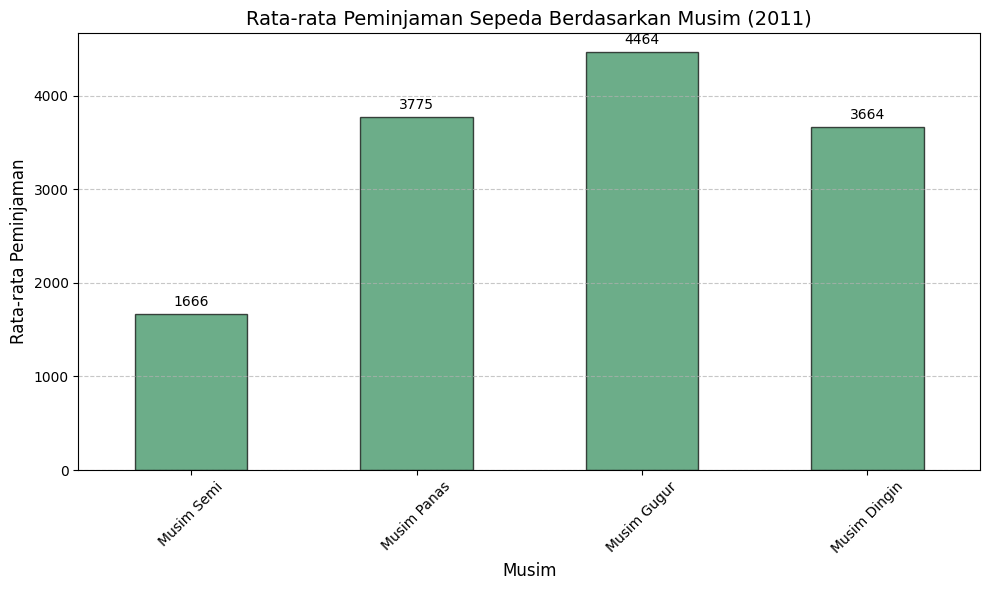

Musim dengan peminjaman sepeda paling banyak: Musim Gugur (4464 peminjaman)
Musim dengan peminjaman sepeda paling sedikit: Musim Semi (1666 peminjaman)


In [63]:
# Rata-rata peminjaman sepeda per musim
season_rental_avg = daily_data_2011.groupby('season')['cnt'].mean()

# Nama musim
season_names = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
season_rental_avg.index = season_rental_avg.index.map(season_names)

# Membuat diagram batang dengan penyesuaian
plt.figure(figsize=(10, 6))
ax = season_rental_avg.plot(kind='bar', color='seagreen', edgecolor='black', alpha=0.7)

# Menambahkan rincian total dalam bentuk integer di atas setiap batang agar terlihat jelas
for i, v in enumerate(season_rental_avg):
    ax.text(i, v + 50, f'{int(v)}', ha='center', va='bottom', fontsize=10, color='black')

# Menambahkan judul dan label
plt.title("Rata-rata Peminjaman Sepeda Berdasarkan Musim (2011)", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Rata-rata Peminjaman", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menyesuaikan sumbu Y agar tidak terlalu sempit dan ada sedikit ruang di atas batang
plt.ylim(0, season_rental_avg.max() + 200)

# Menampilkan plot
plt.tight_layout()
plt.show()

# Menentukan musim dengan peminjaman tertinggi dan terendah
max_season = season_rental_avg.idxmax()
min_season = season_rental_avg.idxmin()

max_rentals = season_rental_avg.max()
min_rentals = season_rental_avg.min()

# Menampilkan hasil musim dengan peminjaman tertinggi dan terendah
print(f"Musim dengan peminjaman sepeda paling banyak: {max_season} ({int(max_rentals)} peminjaman)")
print(f"Musim dengan peminjaman sepeda paling sedikit: {min_season} ({int(min_rentals)} peminjaman)")


## Conclusion

- Peminjaman sepeda tertinggi terjadi pada bulan Juni, dengan total peminjaman mencapai 143,512.
- Peminjaman sepeda terendah terjadi pada bulan Januari, dengan hanya 38,189 peminjaman.
- Secara umum, peminjaman sepeda cenderung lebih tinggi pada bulan-bulan tertentu yang bisa dipengaruhi oleh faktor cuaca atau musim.
- Peminjaman sepeda tertinggi terjadi pada kondisi cuaca cerah.
- Peminjaman sepeda terendah tercatat pada kondisi cuaca hujan lebat.
- Secara umum, kondisi cuaca yang lebih baik seperti cerah dan mendung mendukung peminjaman sepeda yang lebih banyak.
- Musim dengan peminjaman sepeda tertinggi adalah Musim Gugur, dengan total peminjaman mencapai 4,464.
- Musim dengan peminjaman sepeda terendah adalah Musim Semi, dengan hanya 1,667 peminjaman.
- Musim panas dan musim semi cenderung menunjukkan peminjaman yang lebih tinggi, sementara musim dingin dan musim gugur menunjukkan peminjaman yang lebih rendah.